In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tqdm import tqdm
import PIL

In [2]:
import os
for dirname, _, filenames in os.walk('/home/snekha/datasets/images'):
    for filename in filenames:
        os.path.join(dirname, filename)

In [3]:
# !pip3 install tqdm

In [5]:
DATADIR = '/home/snekha/datasets/images'
CATEGORIES = ['healthy','depressed']
IMG_SIZE=100

In [7]:
import pathlib
data_dir = pathlib.Path("/home/snekha/datasets/images")

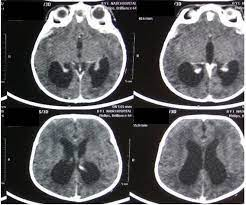

In [8]:
depressed = list(data_dir.glob('depressed/*'))
PIL.Image.open(str(depressed[0]))

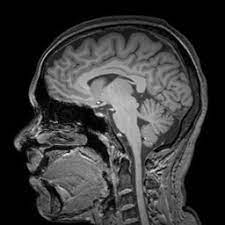

In [9]:
healthy = list(data_dir.glob('healthy/*'))
PIL.Image.open(str(healthy[0]))

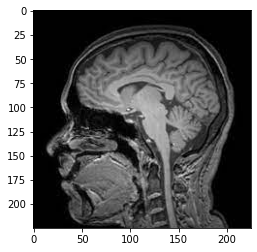

In [11]:
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [12]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()   

In [13]:
print(len(training_data))

1000


In [14]:
lenofimage = len(training_data)

In [15]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)
##X = tf.keras.utils.normalize(X, axis = 1)

In [16]:
# categories

In [17]:
X.shape

(1000, 30000)

In [18]:
X = X/255.0

In [19]:
X[1]

array([0.90980392, 0.90980392, 0.90980392, ..., 0.90980392, 0.90980392,
       0.90980392])

In [20]:
y=np.array(y)

In [21]:
y.shape

(1000,)

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.32, random_state=100, stratify=y)

In [71]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
model=GridSearchCV(svc,param_grid)

In [65]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

In [66]:
y2 = svc.predict(X_test)

In [67]:
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(y_test,y2))

Accuracy on unknown data is 0.621875


In [68]:
from sklearn.metrics import classification_report
print("Accuracy on unknown data is",classification_report(y_test,y2))

Accuracy on unknown data is               precision    recall  f1-score   support

           0       0.62      0.62      0.62       160
           1       0.62      0.62      0.62       160

    accuracy                           0.62       320
   macro avg       0.62      0.62      0.62       320
weighted avg       0.62      0.62      0.62       320



In [69]:
result = pd.DataFrame({'original' : y_test,'predicted' : y2})

In [70]:
result

,original,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
315,0,0
316,0,0
317,0,0
318,0,1
